# Classification Project: Telco Churn

## Table of Contents

* [Package Imports](#packages_import)
* [Acquire](#data_import)
* [Prepare](#prepare)
* [Explore Process](#explore1)
    * [Question 1](#q_1)
        * [Q1 Visualization](#q_1_viz)
        * [Q1 Statistical Test](#q_1_stats)
        * [Q1 Answer](#q_1_ans)
    * [Question 2](#q_2)
        * [Q2 Visualization](#q_2_viz)
        * [Q2 Statistical Test](#q_2_stats)
        * [Q2 Answer](#q_2_ans)    
    * [Question 3](#q_3)
        * [Q3 Visualization](#q_3_viz)
        * [Q3 Statistical Test](#q_3_stats)
        * [Q3 Answer](#q_3_ans)    
    * [Question 4](#q_4)
        * [Q4 Visualization](#q_4_viz)
        * [Q4 Statistical Test](#q_4_stats)
        * [Q4 Answer](#q_4_ans)
    * [Question 5](#q_5)
        * [Q5 Visualization](#q_5_viz)
        * [Q5 Statistical Test](#q_5_stats)
        * [Q5 Answer](#q_5_ans)
    * [Question 6](#q_6)
        * [Q6 Visualization](#q_6_viz)
        * [Q6 Statistical Test](#q_6_stats)
        * [Q6 Answer](#q_6_ans)
* [Explore Summary](#explore2)
* [Modeling](#modeling)
    * [Introduction](#m_intro)
    * [Baseline](#baseline)
    * [Model 1](#mod_1)
    * [Model 2](#mod_2)
    * [Model 3](#mod_3)
    * [Model 4](#mod_4)
* [Conclusion](#conclusion)
    * [Summery](#c_summery)
    * [Recommendations](#c_recs)
    * [Next Steps](#c_steps)

## Package Imports <a class="anchor" id="packages_import"></a>


In [1]:
#Importing required packages and files
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#These imports were constructed
from acquire import get_telco_data
from prepare import prep_telco, train_validate

#Tools to build machine learning models and reports
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Removes warnings and imporves asthenics
import warnings
warnings.filterwarnings("ignore")

#Sets an option to show all columns
pd.options.display.max_columns = None

## Acquire<a class="anchor" id="data_import"></a>

In [2]:
#First tries to get telco data from catche or aquires new data from MySQL database and assigns it to the master Data Frame: 
master_df = get_telco_data()

In [3]:
master_df.shape

(7043, 24)

In [4]:
master_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,churn_month,paperless_billing,gender,senior_citizen,partner,dependents,monthly_charges,total_charges,signup_date,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Yes,No,No,Yes,No,Yes,Yes,No,NaN,Yes,Female,0,Yes,Yes,65.6,593.3,2021-04-21 18:07:34,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Yes,Yes,No,No,No,No,No,Yes,NaN,No,Male,0,No,No,59.9,542.4,2021-04-21 18:07:34,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Yes,No,No,No,Yes,No,No,No,2022-01-31,Yes,Male,0,No,No,73.9,280.85,2021-09-21 18:07:34,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Yes,No,No,Yes,Yes,No,Yes,Yes,2022-01-31,Yes,Male,1,Yes,No,98.0,1237.85,2020-12-21 18:07:34,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Yes,No,No,No,No,Yes,Yes,No,2022-01-31,Yes,Female,1,Yes,No,83.9,267.4,2021-10-21 18:07:34,Month-to-month,Fiber optic,Mailed check


## Prepare <a class="anchor" id="prepare"></a>

In [5]:
#Takes the master_df and prepares the data for statistical and machine learning analysis:
working_df = prep_telco(master_df)
working_df.head()

,paperless_billing,senior_citizen,partner,dependents,monthly_charges,total_charges,churn,tenure,gender_Female,gender_Male,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,online_security_No,online_security_No internet service,online_security_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
0,1,0,1,1,65.6,593.30,0,9.0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
1,0,0,0,0,59.9,542.40,0,9.0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0
2,1,0,0,0,73.9,280.85,1,4.0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0
3,1,1,1,0,98.0,1237.85,1,13.0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0
4,1,1,1,0,83.9,267.40,1,3.0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0


In [6]:
#Seperate data into train(80%), validate(14%) and test(6%) Data Frames:
#Random seed of 1969
train_df, val_df, test_df = train_validate(working_df, stratify_col='churn')
sum(train_df.churn) / len(train_df.churn)

0.2652802434694395

In [7]:
#Looking at columns
train_df.head()

,paperless_billing,senior_citizen,partner,dependents,monthly_charges,total_charges,churn,tenure,gender_Female,gender_Male,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,online_security_No,online_security_No internet service,online_security_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
2904,0,0,0,0,90.75,174.75,0,2.0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0
4584,1,0,1,1,99.35,4749.15,1,48.0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
6709,1,0,0,0,87.75,1242.20,0,14.0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0
657,1,0,0,1,109.20,5290.45,0,48.0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
164,0,0,1,1,100.70,1522.70,0,15.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0


## Explore process <a class="anchor" id="explore1"></a>

In [8]:
#Split into a churn and not churn DataFrame to explore:
churn_df = train_df[train_df.churn == 1]
print(f'churn_df length: {len(churn_df)}')
no_churn = train_df[train_df.churn == 0]
print(f'no_churn length: {len(no_churn)}')

churn_df length: 1046
no_churn length: 2897


Takeaway: there are 26.5% of people that churned and 73.5% have not churned.

In [9]:
#Removing target and non categorical columns
cols_to_drop = ['monthly_charges', 'tenure', 'total_charges', 'churn']
churn_df.drop(columns=cols_to_drop, inplace = True)
no_churn.drop(columns=cols_to_drop, inplace = True)

In [10]:
#Printing a comparison between the baseline and the churn/no_churn DataFrames:
distros = []
for item in churn_df:
    bl = round(sum(train_df[item]) / len(train_df[item]) * 100,1)
    churn = round(sum(churn_df[item]) / len(churn_df[item]) * 100,1)
    no_c = round(sum(no_churn[item]) / len(no_churn[item]) * 100,1)
    
    output = {"Column" : item,
              "Churn %": churn, 
              "Baseline %" : bl , 
              "Not Churn %": no_c,
              "Churn Indication":(churn - no_c) }
              
    distros.append(output)
dis_df = pd.DataFrame(distros)              
dis_df = dis_df.set_index('Column')
churn_ind = dis_df.sort_values("Churn Indication", ascending=False).head(4)
anti_churn = dis_df.sort_values("Churn Indication", ascending=True).head(4)
dis_df

,Churn %,Baseline %,Not Churn %,Churn Indication
Column,,,,
paperless_billing,75.1,59.5,53.8,21.3
senior_citizen,24.6,15.8,12.6,12.0
partner,35.6,48.4,53.1,-17.5
dependents,19.0,30.6,34.8,-15.8
gender_Female,51.1,50.1,49.8,1.3
gender_Male,48.9,49.9,50.2,-1.3
streaming_movies_No,50.7,40.1,36.3,14.4
streaming_movies_No internet service,5.8,21.4,27.0,-21.2
streaming_movies_Yes,43.5,38.4,36.6,6.9


Features with a high or low deviation from the baseline to focus on: 

In [11]:
#Indicators of churn
churn_ind["Churn Indication"]

Column
contract_type_Month-to-month         47.1
tech_support_No                      38.8
online_security_No                   36.9
internet_service_type_Fiber optic    34.9
Name: Churn Indication, dtype: float64

In [12]:
#Indicators that a customer won't churn
anti_churn["Churn Indication"]

Column
contract_type_Two year                  -29.3
device_protection_No internet service   -21.2
online_security_No internet service     -21.2
online_backup_No internet service       -21.2
Name: Churn Indication, dtype: float64

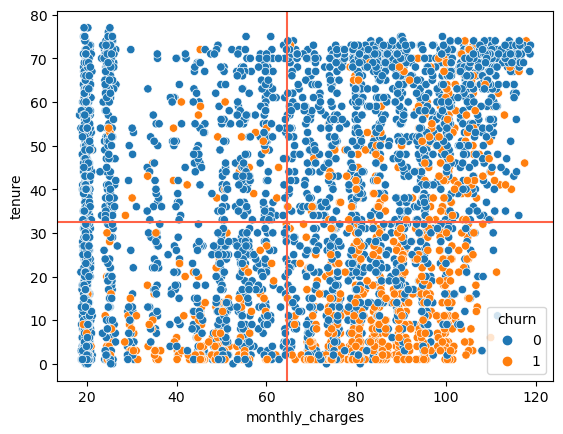

In [13]:
#building a plot to show a relationship between tenure, monthly_charges and churn
sns.scatterplot(data = train_df, 
                y = 'tenure', 
                x = 'monthly_charges', 
                hue='churn')
month_ave = train_df.monthly_charges.mean()
tenure_ave = train_df.tenure.mean()
plt.axhline(tenure_ave, label="Tenure Average", c='tomato')
plt.axvline(month_ave, label="Monthly Charges Average", c='tomato')

Takeaway: It appears that a low tenure and high monthly charge have a relationship with churn.

<AxesSubplot:xlabel='tenure', ylabel='Count'>

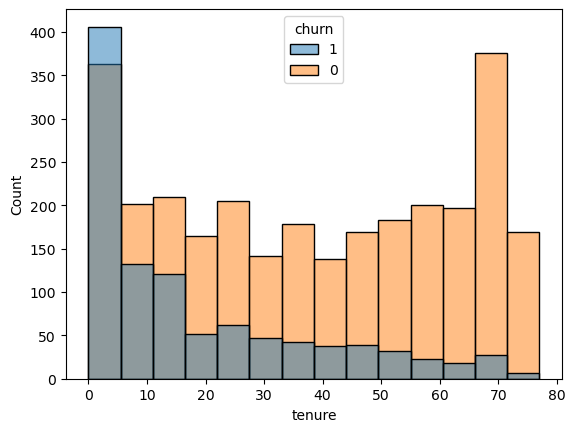

In [14]:
#Visualizing tenure and churn
sns.histplot(x='tenure', data=train_df, hue='churn',hue_order=[1,0])

Customers who churn tend to have much shorter tenure.

<AxesSubplot:xlabel='monthly_charges', ylabel='Count'>

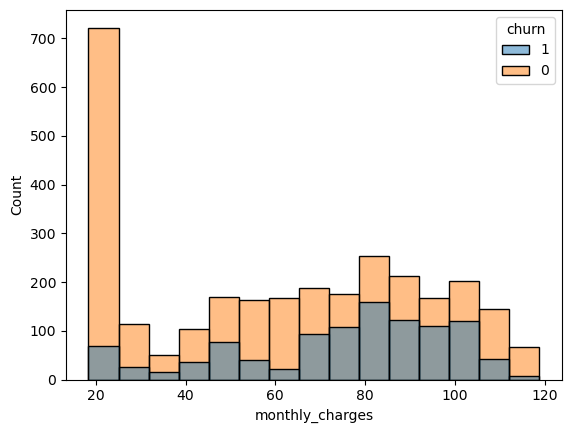

In [15]:
#Visualizing churn and monthly_charges
sns.histplot(x='monthly_charges', data=train_df, hue='churn', hue_order=[1,0])

Customers who churn tend to have much shorter tenure.

### Question 1 <a class="anchor" id="q_1"></a>

What is the relatiohship between having a contract type of Month-to-month and churn?

#### Q1 Visualization <a class="anchor" id="q_1_viz"></a>

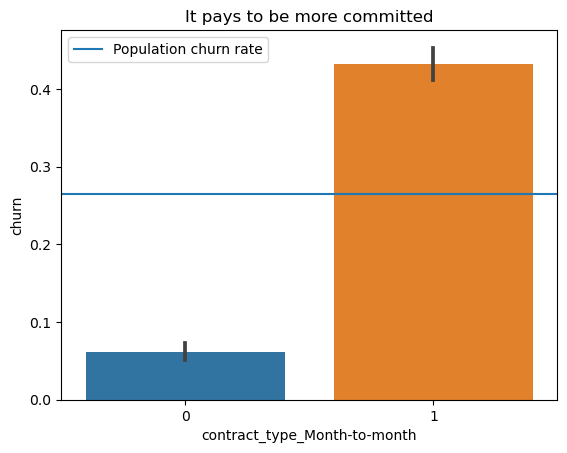

In [16]:
#building a plot to show a relationship
plt.title("It pays to be more committed")
sns.barplot(x='contract_type_Month-to-month', y='churn', data=train_df)
pop_churn_rate = train_df.churn.mean()
plt.axhline(pop_churn_rate, label="Population churn rate")
plt.legend()
plt.show()

#### Q1 Statistical Test <a class="anchor" id="q_1_stats"></a>

In [17]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "customers with Month-to-month contracts and that churn are independent"
alternative_hypothesis = "there is a relationship between customers with Month-to-month contracts and that churn"

# Setup a crosstab of observed churn to contract_type_Month-to-month
observed = pd.crosstab(train_df.churn, train_df['contract_type_Month-to-month'])

chi2, p1, degf, expected = stats.chi2_contingency(observed)

#### Q1 Answer <a class="anchor" id="q_1_ans"></a>

In [18]:
#Answer logic
if p1 < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p1

Reject the null hypothesis that customers with Month-to-month contracts and that churn are independent
Sufficient evidence to move forward understanding that there is a relationship between customers with Month-to-month contracts and that churn


2.6129757677254923e-151

### Question 2 <a class="anchor" id="q_2"></a>

Is there a relationship between having Fiber optic internet service type and churn?

#### Q2 Visualization <a class="anchor" id="q_2_viz"></a>

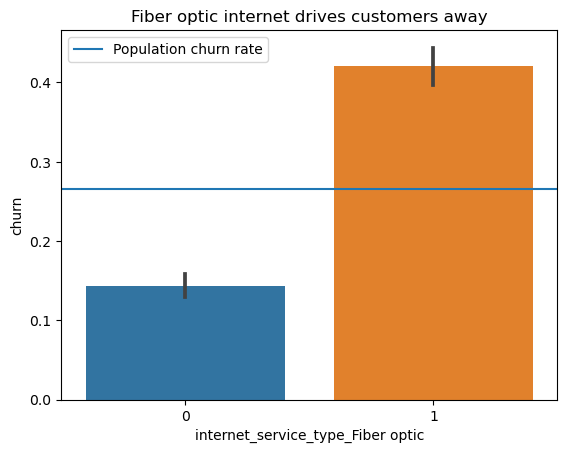

In [19]:
#building a plot to show a relationship
plt.title("Fiber optic internet drives customers away")
sns.barplot(x='internet_service_type_Fiber optic', y='churn', data=train_df)
pop_churn_rate = train_df.churn.mean()
plt.axhline(pop_churn_rate, label="Population churn rate")
plt.legend()
plt.show()

#### Q2 Statistical Test <a class="anchor" id="q_2_stats"></a>

In [20]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "customers with fiber optic internet service and that churn are independent"
alternative_hypothesis = "there is a relationship between customers with fiber optic internet service and that churn"

# Setup a crosstab of observed churn to internet_service_type_Fiber optic
observed = pd.crosstab(train_df.churn, train_df['internet_service_type_Fiber optic'])

chi2, p2, degf, expected = stats.chi2_contingency(observed)

#### Q2 Answer <a class="anchor" id="q_2_ans"></a>

In [21]:
#Answer logic
if p2 < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p2

Reject the null hypothesis that customers with fiber optic internet service and that churn are independent
Sufficient evidence to move forward understanding that there is a relationship between customers with fiber optic internet service and that churn


1.5755854888703442e-84

### Question 3 <a class="anchor" id="q_3"></a>

Is there a relationship between not having tech support and churn?

#### Q3 Visualization <a class="anchor" id="q_3_viz"></a>

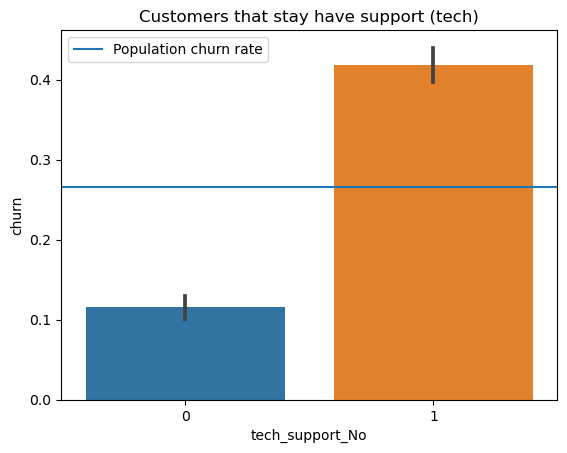

In [22]:
#building a plot to show a relationship
plt.title("Customers that stay have support (tech)")
sns.barplot(x='tech_support_No', y='churn', data=train_df)
pop_churn_rate = train_df.churn.mean()
plt.axhline(pop_churn_rate, label="Population churn rate")
plt.legend()
plt.show()

#### Q3 Statistical Test <a class="anchor" id="q_3_stats"></a>

In [23]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "customers who don't have tech support and that churn are independent"
alternative_hypothesis = "there is a relationship between customers that without tech support and that churn"

# Setup a crosstab of observed churn to payment_type_Electronic check
observed = pd.crosstab(train_df.churn, train_df['tech_support_No'])

chi2, p3, degf, expected = stats.chi2_contingency(observed)

#### Q3 Answer <a class="anchor" id="q_3_ans"></a>

In [24]:
#Answer logic
if p3 < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p3

Reject the null hypothesis that customers who don't have tech support and that churn are independent
Sufficient evidence to move forward understanding that there is a relationship between customers that without tech support and that churn


2.581300101624473e-102

### Question 4 <a class="anchor" id="q_4"></a>

Is there a relationship between having no internet service and churn?

#### Q4 Visualization <a class="anchor" id="q_4_viz"></a>

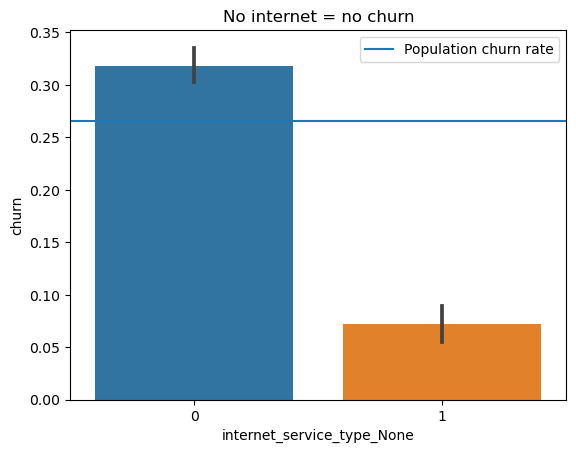

In [25]:
#building a plot to show a relationship
plt.title("No internet = no churn")
sns.barplot(x='internet_service_type_None', y='churn', data=train_df)
pop_churn_rate = train_df.churn.mean()
plt.axhline(pop_churn_rate, label="Population churn rate")
plt.legend()
plt.show()

#### Q4 Statistical Test <a class="anchor" id="q_4_stats"></a>

In [26]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "customers with no internet service and that churn are independent"
alternative_hypothesis = "there is a relationship between customers with no internet service and that churn"

# Setup a crosstab of observed churn to having no internet service
observed = pd.crosstab(train_df.churn, train_df['internet_service_type_None'])

chi2, p4, degf, expected = stats.chi2_contingency(observed)

#### Q4 Answer <a class="anchor" id="q_4_ans"></a>

In [27]:
#Answer logic
if p4 < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p4

Reject the null hypothesis that customers with no internet service and that churn are independent
Sufficient evidence to move forward understanding that there is a relationship between customers with no internet service and that churn


2.8258083144357664e-46

### Question 5 <a class="anchor" id="q_5"></a>

In [28]:
#Doing MVP first

#### Q5 Visualization <a class="anchor" id="q_5_viz"></a>

#### Q5 Statistical Test <a class="anchor" id="q_5_stats"></a>

In [29]:
#One sample T-Test for monthly_charges and churn

#### Q5 Answer <a class="anchor" id="q_5_ans"></a>

### Question 6 <a class="anchor" id="q_6"></a>

In [30]:
#Doing MVP first

#### Q6 Visualization <a class="anchor" id="q_6_viz"></a>

#### Q6 Statistical Test <a class="anchor" id="q_6_stats"></a>

In [31]:
#One sample T-Test for total_charges and churn

#### Q6 Answer <a class="anchor" id="q_6_ans"></a>

## Explore summary <a class="anchor" id="explore2"></a>

During the explore process there were four categorical features which were shown to have a relationship with customer churn. Those are:
1. contract_type_Month-to-month (higher than baseline)
2. internet_service_type_Fiber optic (higher than baseline)
3. tech_support_No (higher than baseline)
4. internet_service_type_None (lower than baseline)

## Modeling <a class="anchor" id="modeling"></a>

In [32]:
#Seperating out the target variable
X_train = train_df.drop(columns=['churn'])
y_train = train_df.churn

X_val = val_df.drop(columns = ['churn'])
y_val = val_df.churn

X_test = test_df.drop(columns = ['churn'])
y_test = test_df.churn

### Introduction <a class="anchor" id="m_intro"></a>

### Baseline <a class="anchor" id="baseline"></a>

In [33]:
#Finding the churn baseline
baseline = round(sum(train_df.churn) / len(train_df.churn), 2)
baseline

0.27

### Model 1 <a class="anchor" id="mod_1"></a>

In [34]:
#Create the model
clf = DecisionTreeClassifier(max_depth=3, random_state=1969)

In [35]:
#Train the model
clf = clf.fit(X_train, y_train)

In [36]:
#Make prediction on train DataFrame
y_pred1 = clf.predict(X_train)

In [37]:
#Estimate probability
y_pred_proba1 = clf.predict_proba(X_train)

In [38]:
#Finding the Accuracy
print(f'Accuracy of Decision Tree classifier on training set: {clf.score(X_train, y_train):.2f}')

Accuracy of Decision Tree classifier on training set: 0.79


In [39]:
#classification report
print(classification_report(y_train, y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      2897
           1       0.71      0.37      0.49      1046

    accuracy                           0.79      3943
   macro avg       0.76      0.66      0.68      3943
weighted avg       0.78      0.79      0.77      3943



In [40]:
#Feature importance
feat = []
for i in range(0,len(X_train.columns)):    
    output = {"Column" : X_train.columns[i],
          "Importance": clf.feature_importances_[i]}
              
    feat.append(output)
import1_df = pd.DataFrame(feat)              
import1_df = import1_df.set_index('Column')
import1_df

,Importance
Column,
paperless_billing,0.000000
senior_citizen,0.000000
partner,0.000000
dependents,0.000000
monthly_charges,0.011238
total_charges,0.116251
tenure,0.056988
gender_Female,0.000000
gender_Male,0.000000


In [41]:
#Finding the best max_depth for decision tree
metrics1 = []

for i in range(1, 25):
    trees = DecisionTreeClassifier(max_depth=i, random_state=1969)
    trees = trees.fit(X_train, y_train)
    in_sample_accuracy = trees.score(X_train, y_train)
    out_of_sample_accuracy = trees.score(X_val, y_val)

    output = {"max_depth" : i, "train_accuracy": in_sample_accuracy, "validate_accuracy": out_of_sample_accuracy}
              
    metrics1.append(output)

tree_df = pd.DataFrame(metrics1)              
tree_df['difference'] = tree_df.train_accuracy - tree_df.validate_accuracy                           

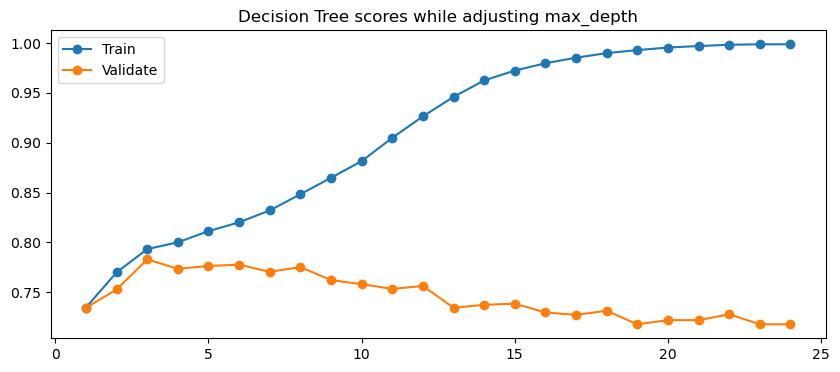

In [42]:
#Plotting the decision tree scores
plt.figure(figsize=(10,4))
plt.plot(tree_df.max_depth, tree_df.train_accuracy, marker = 'o', label= 'Train')
plt.plot(tree_df.max_depth, tree_df.validate_accuracy, marker = 'o', label= 'Validate')
plt.legend()
plt.title("Decision Tree scores while adjusting max_depth")
plt.show()


### Model 2 <a class="anchor" id="mod_2"></a>

In [43]:
#Creating the random forest object
rf = RandomForestClassifier(bootstrap=True,
                            class_weight=None,
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3,
                            random_state=1969)

In [44]:
#Fit the model to the train data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=1969)

In [45]:
#Feature importance
feat = []
for i in range(0,len(X_train.columns)):    
    output = {"Column" : X_train.columns[i],
          "Importance": rf.feature_importances_[i]}
              
    feat.append(output)
import2_df = pd.DataFrame(feat)              
import2_df = import2_df.set_index('Column')
import2_df

,Importance
Column,
paperless_billing,0.002869
senior_citizen,0.000247
partner,0.001483
dependents,0.001346
monthly_charges,0.026729
total_charges,0.061614
tenure,0.133616
gender_Female,0.000216
gender_Male,0.000000


In [46]:
#Make prediction on train DataFrame
y_pred2 = rf.predict(X_train)

#Estimate probability
y_pred_proba2 = rf.predict_proba(X_train)

In [47]:
#Finding the Accuracy
print(f'Accuracy of Random Forest classifier on training set: {rf.score(X_train, y_train):.2f}')

Accuracy of Random Forest classifier on training set: 0.79


In [48]:
#classification report
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      2897
           1       0.74      0.33      0.46      1046

    accuracy                           0.79      3943
   macro avg       0.77      0.64      0.66      3943
weighted avg       0.78      0.79      0.76      3943



In [49]:
#Finding the best max_depth for random forest
rf_metrics = []

for i in range(1, 25):
    forest = RandomForestClassifier(max_depth=i,
                                    random_state=1969,
                                    bootstrap=True, 
                                    class_weight=None, 
                                    criterion='gini', 
                                    min_samples_leaf=3, 
                                    n_estimators=100)
    forest = forest.fit(X_train, y_train)
    in_sample_accuracy = forest.score(X_train, y_train)
    out_of_sample_accuracy = forest.score(X_val, y_val)

    output = {"max_depth" : i, "train_accuracy": in_sample_accuracy, "validate_accuracy": out_of_sample_accuracy}
              
    rf_metrics.append(output)

forest_df = pd.DataFrame(rf_metrics)              
forest_df['difference'] = forest_df.train_accuracy - forest_df.validate_accuracy                           

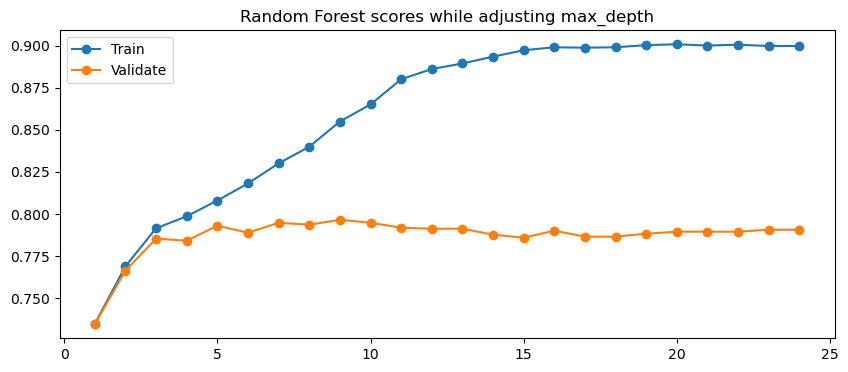

In [50]:
#Plotting the random forest scores
plt.figure(figsize=(10,4))
plt.plot(forest_df.max_depth, forest_df.train_accuracy, marker = 'o', label= 'Train')
plt.plot(forest_df.max_depth, forest_df.validate_accuracy, marker = 'o', label= 'Validate')
plt.legend()
plt.title("Random Forest scores while adjusting max_depth")
plt.show()


### Model 3 <a class="anchor" id="mod_3"></a>

In [51]:
#Creating the model
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [52]:
#Fitting the KNN model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [53]:
#Creating predictions
y_pred3 = knn.predict(X_train)

In [54]:
#Creating probability estimates from train data
y_pred_proba3 = knn.predict_proba(X_train)

In [55]:
#Finding the Accuracy
print(f'Accuracy of KNN classifier on training set: {knn.score(X_train, y_train):.4f}')

Accuracy of KNN classifier on training set: 0.8098


In [56]:
#classification report
print(classification_report(y_train, y_pred3))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      2897
           1       0.75      0.42      0.54      1046

    accuracy                           0.81      3943
   macro avg       0.79      0.69      0.71      3943
weighted avg       0.80      0.81      0.79      3943



In [57]:
#Finding the best number of neighbors
k_range = range(1, 22)
scores = []
for k in range(1,22):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)

    in_sample_accuracy = knn.score(X_train, y_train)
    out_of_sample_accuracy = knn.score(X_val, y_val)

    output = {"N_neighbors" : k, "train_accuracy": in_sample_accuracy, "validate_accuracy": out_of_sample_accuracy}
              
    scores.append(output)

knn_df = pd.DataFrame(scores)              
knn_df['difference'] = knn_df.train_accuracy - knn_df.validate_accuracy    

In [58]:
knn_df

,N_neighbors,train_accuracy,validate_accuracy,difference
0,1,0.998732,0.713187,0.285544
1,2,0.858737,0.751626,0.107111
2,3,0.856708,0.740390,0.116318
3,4,0.833629,0.761088,0.072541
4,5,0.830839,0.764045,0.066795
5,6,0.821709,0.771141,0.050568
6,7,0.822977,0.766410,0.056567
7,8,0.817905,0.768185,0.049721
8,9,0.818159,0.768185,0.049974
9,10,0.809790,0.780603,0.029186


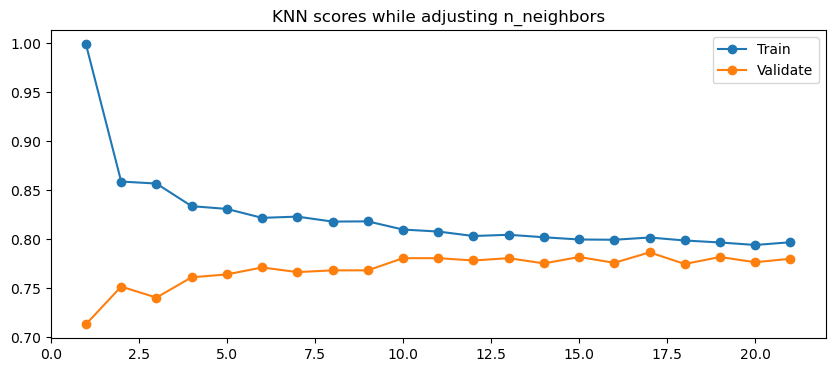

In [59]:
#Plotting the train versus validate scores
plt.figure(figsize=(10,4))
plt.plot(knn_df.N_neighbors, knn_df.train_accuracy, marker = 'o', label= 'Train')
plt.plot(knn_df.N_neighbors, knn_df.validate_accuracy, marker = 'o', label= 'Validate')
plt.legend()
plt.title("KNN scores while adjusting n_neighbors")
plt.show()

In [60]:
y_pred_val = knn.predict(X_val)

In [61]:
print(f'Accuracy of KNN classifier on validation set: {knn.score(X_val, y_val):.4f}')

Accuracy of KNN classifier on validation set: 0.7800


### Model 4 <a class="anchor" id="mod_4"></a>

In [62]:
#Creating a logistic regression model
logit = LogisticRegression(random_state=1969)

In [63]:
#Fitting the model to the train dataset
logit.fit(X_train, y_train)

LogisticRegression(random_state=1969)

In [64]:
#Finding the score of the model
logit.score(X_train, y_train)

0.8054780623890438

In [65]:
#Finding the score of the model
logit.score(X_val, y_val)

0.7995269071555293

In [66]:
#Making a prediction based on the train data
y_pred = logit.predict(X_train)

## Conclusion <a class="anchor" id="conclusion"></a>

The best performing model was the Logistic Regression classifier and had an accuracy of 0.805 on the training set. 

Accuracy of Logistic Regression classifier on validation set: 0.7995

In [67]:
#Final run of the model on the test set
print(f'Accuracy of KNN classifier on the final test set is: {logit.score(X_test, y_test):.4f}')

Accuracy of KNN classifier on the final test set is: 0.8041


### Summery <a class="anchor" id="c_summery"></a>

Churn occurs at 26.5% in the Telco dataset. The drivers of churn are: 
- Having a month-to-month contract
- Not having tech support or online security
- Having fiber optic internet 
- Low tenure/being a new customer
- Higher monthly charges

### Recommendations <a class="anchor" id="c_recs"></a>

- Incentivize Month-to-month and fiber optic customers to stay.
- Evaluate pricing and quality of fiber optic internet service.
- Evaluate pricing and impact of tech support and online security.
- Consider lowering prices for newer customers.
- Once churn decreases, evaluate pricing power on phone services and two year contracts.

### Next Steps <a class="anchor" id="c_steps"></a>

- Do statistical testing on the monthly_charges and total_charges features
- Create a way to automatically compare churn for continuous features
- Dig in deeper on features which have greater than 10% indication of churn.
- Evaluate fiber optic internet type to identify focus areas.